<h1><br>One Hot Encoding</h1></br>

In [1]:
import pandas as pd

#create DataFrame
df = pd.DataFrame({'team': ['A', 'A', 'B', 'B', 'B', 'B', 'C', 'C'],
                   'points': [25, 12, 15, 14, 19, 23, 25, 29]})

#view DataFrame
print(df)

  team  points
0    A      25
1    A      12
2    B      15
3    B      14
4    B      19
5    B      23
6    C      25
7    C      29


In [2]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df[['team']]).toarray())

#merge one-hot encoded columns back with original DataFrame
final_df = df.join(encoder_df)

#view final df
print(final_df)

  team  points    0    1    2
0    A      25  1.0  0.0  0.0
1    A      12  1.0  0.0  0.0
2    B      15  0.0  1.0  0.0
3    B      14  0.0  1.0  0.0
4    B      19  0.0  1.0  0.0
5    B      23  0.0  1.0  0.0
6    C      25  0.0  0.0  1.0
7    C      29  0.0  0.0  1.0


<h1><br>Bag of WOrds (BoW)</h1></br>

In [3]:
#Creating frequency distribution of words using nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
text="""Achievers are not afraid of Challenges, rather they relish them, thrive in them, use them. Challenges makes is stronger.
        Challenges makes us uncomfortable. If you get comfortable with uncomfort then you will grow. Challenge the challenge """

In [5]:
#Tokenize the sentences from the text corpus
tokenized_text=sent_tokenize(text)#using CountVectorizer and removing stopwords in english language
cv1= CountVectorizer(lowercase=True,stop_words='english')#fitting the tonized senetnecs to the countvectorizer
text_counts=cv1.fit_transform(tokenized_text)

In [6]:
# printing the vocabulary and the frequency distribution pf vocabulary in tokinzed sentences
print(cv1.vocabulary_)
print(text_counts.toarray())

{'achievers': 0, 'afraid': 1, 'challenges': 3, 'relish': 7, 'thrive': 9, 'use': 12, 'makes': 6, 'stronger': 8, 'uncomfortable': 11, 'comfortable': 4, 'uncomfort': 10, 'grow': 5, 'challenge': 2}
[[1 1 0 1 0 0 0 1 0 1 0 0 1]
 [0 0 0 1 0 0 1 0 1 0 0 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 1 0]
 [0 0 0 0 1 1 0 0 0 0 1 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0]]


<h1><br>TF-IDF (Term Frequency-Inverse Document Frequency)</h1></br>

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
text = ["The cycle is ridden on the track.",
	"The bus is driven on the road.",
	"He is driving the bus."]

# create the transform
vectorizer = TfidfVectorizer()

# tokenize and build vocab
vectorizer.fit(text)

# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)

{'the': 9, 'cycle': 1, 'is': 5, 'ridden': 7, 'on': 6, 'track': 10, 'bus': 0, 'driven': 2, 'road': 8, 'he': 4, 'driving': 3}
[1.28768207 1.69314718 1.69314718 1.69314718 1.69314718 1.
 1.28768207 1.69314718 1.69314718 1.         1.69314718]


<h1><br>Word2Vec</h1></br>

In [16]:
import string
import nltk
from nltk.corpus import brown
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
 
nltk.download("brown")
 

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\us\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [17]:
# Preprocessing data to lowercase all words and remove single punctuation words
document = brown.sents()
data = []
for sent in document:
    new_sent = []
    for word in sent:
        new_word = word.lower()
        if new_word[0] not in string.punctuation:
            new_sent.append(new_word)
    if len(new_sent) > 0:
        data.append(new_sent)

In [19]:
data

[['the',
  'fulton',
  'county',
  'grand',
  'jury',
  'said',
  'friday',
  'an',
  'investigation',
  'of',
  "atlanta's",
  'recent',
  'primary',
  'election',
  'produced',
  'no',
  'evidence',
  'that',
  'any',
  'irregularities',
  'took',
  'place'],
 ['the',
  'jury',
  'further',
  'said',
  'in',
  'term-end',
  'presentments',
  'that',
  'the',
  'city',
  'executive',
  'committee',
  'which',
  'had',
  'over-all',
  'charge',
  'of',
  'the',
  'election',
  'deserves',
  'the',
  'praise',
  'and',
  'thanks',
  'of',
  'the',
  'city',
  'of',
  'atlanta',
  'for',
  'the',
  'manner',
  'in',
  'which',
  'the',
  'election',
  'was',
  'conducted'],
 ['the',
  'september-october',
  'term',
  'jury',
  'had',
  'been',
  'charged',
  'by',
  'fulton',
  'superior',
  'court',
  'judge',
  'durwood',
  'pye',
  'to',
  'investigate',
  'reports',
  'of',
  'possible',
  'irregularities',
  'in',
  'the',
  'hard-fought',
  'primary',
  'which',
  'was',
  'won',
 

In [23]:
# Creating Word2Vec
model = Word2Vec(
    sentences = data,
    vector_size = 30,
    window = 10,
    epochs = 40,
)

In [29]:
# Vector for word love
print("Vector for love:")
print(model.wv["plane"])
print()

Vector for love:
[-1.2570845   0.66675705  1.3591135  -1.8039767  -1.7485442   0.14883085
 -1.282998    1.0233531  -3.7883062  -2.7303383   2.2706401  -1.99947
 -3.0118666   2.2931101  -0.6176255   1.7409718   2.322858    4.135598
  0.8520511   1.2761718   0.82217777 -0.49561065  1.37381    -0.05803893
  4.253021   -3.0588136  -0.7963633   0.88736737 -2.085219   -1.8368146 ]



In [30]:
# Vector for word love
print("Vector for love:")
print(model.wv["plane"])
print()

Vector for love:
[-1.2570845   0.66675705  1.3591135  -1.8039767  -1.7485442   0.14883085
 -1.282998    1.0233531  -3.7883062  -2.7303383   2.2706401  -1.99947
 -3.0118666   2.2931101  -0.6176255   1.7409718   2.322858    4.135598
  0.8520511   1.2761718   0.82217777 -0.49561065  1.37381    -0.05803893
  4.253021   -3.0588136  -0.7963633   0.88736737 -2.085219   -1.8368146 ]



In [27]:
# Vector for word love
print("Vector for love:")
print(model.wv["teacher"])
print()

Vector for love:
[ 1.0118979   0.6234903  -0.06008041 -1.4670731  -1.8972598  -2.0312142
 -0.53961647 -0.2692017   2.232224   -0.68189996  0.37080273  4.1131754
 -1.3733054   1.5102161  -0.01975286 -4.5639067  -0.79088074  0.30673012
 -1.3397409  -1.8967086   0.25865883  0.03279221 -1.9252498  -0.50313675
 -4.2481537   0.7325994  -1.2702495  -3.665174    2.010598    0.53241426]



In [25]:
# Finding most similar words
print("3 words similar to car")
words = model.wv.most_similar("car", topn=5)
for word in words:
    print(word)
print()


3 words similar to car
('boat', 0.7655097246170044)
('train', 0.6888052225112915)
('back', 0.6754188537597656)
('seat', 0.6711094379425049)
('road', 0.6700834631919861)



In [13]:
#Visualizing data
words = ["france", "germany", "india", "truck", "boat", "road", "teacher", "student"]

In [14]:
X = model.wv[words]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

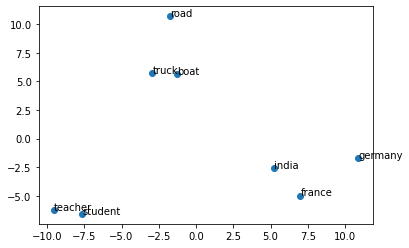

In [15]:
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()